In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [15]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt

Question 1

In [3]:
# Get data frommthe given site 
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [4]:
df = ipo_dfs[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Filing Date     326 non-null    object
 1   Symbol          326 non-null    object
 2   Company Name    326 non-null    object
 3   Price Range     326 non-null    object
 4   Shares Offered  326 non-null    object
dtypes: object(5)
memory usage: 12.9+ KB


In [16]:
df.head()

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Filling Date,Avg_price,Shares_offered_value
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,NaN,2024-05-03,NaN,NaN
1,"Apr 29, 2024",HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,2024-04-29,3.0,11250000.0
2,"Apr 29, 2024",DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,2024-04-29,10.0,60000000.0
3,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000.0,2024-04-26,10.0,50000000.0
4,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,NaN,2024-04-26,NaN,NaN


In [17]:
# Convert 'Filing Date' to datetime
# df['Filing Date'] = pd.to_datetime(df['Filing Date'])

df['Filling Date'] = pd.to_datetime(df['Filing Date'])



In [18]:
# Convert 'Shares Offered' to float64
df['Shares Offered'] = pd.to_numeric(df['Shares Offered'].replace('-', float('NaN')))


In [19]:
import re

In [20]:

# Calculate 'Avg_price'
df['Avg_price'] = df['Price Range'].apply(lambda x: np.nan if x == '-' or not x else (float(re.findall(r'\d+\.?\d*', x)[0]) if len(re.findall(r'\d+\.?\d*', x)) == 1 else (float(re.findall(r'\d+\.?\d*', x)[0]) + float(re.findall(r'\d+\.?\d*', x)[1])) / 2))

In [10]:
df

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Filling Date,Avg_price
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,NaN,2024-05-03,NaN
1,"Apr 29, 2024",HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,2024-04-29,3.00
2,"Apr 29, 2024",DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,2024-04-29,10.00
3,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000.0,2024-04-26,10.00
4,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,NaN,2024-04-26,NaN
...,...,...,...,...,...,...,...
321,"Jan 21, 2020",GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0,2020-01-21,9.00
322,"Jan 21, 2020",UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0,2020-01-21,10.00
323,"Dec 9, 2019",LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0,2019-12-09,9.00
324,"Oct 4, 2019",ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0,2019-10-04,4.00


In [22]:
def calculate_avg_price(price_range):
    if price_range == '-' or not price_range:  # If no price specified or it's "-"
        return np.nan
    prices = re.findall(r'\d+\.?\d*', price_range)  # Extracting prices
    if len(prices) == 1:  # If only one price provided
        return float(prices[0])
    elif len(prices) == 2:  # If a range of prices provided
        return (float(prices[0]) + float(prices[1])) / 2
    else:  # Invalid price format
        return np.nan

df['Avg_price'] = df['Price Range'].apply(calculate_avg_price)

# Define 'Shares_offered_value'
def calculate_shares_offered_value(row):
    if pd.notnull(row['Shares Offered']) and pd.notnull(row['Avg_price']):
        return row['Shares Offered'] * row['Avg_price']
    else:
        return np.nan

df['Shares_offered_value'] = df.apply(calculate_shares_offered_value, axis=1)

df

,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Filling Date,Avg_price,Shares_offered_value
0,"May 3, 2024",TBN,Tamboran Resources Corporation,-,NaN,2024-05-03,NaN,NaN
1,"Apr 29, 2024",HWEC,"HW Electro Co., Ltd.",$3.00,3750000.0,2024-04-29,3.00,11250000.0
2,"Apr 29, 2024",DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000.0,2024-04-29,10.00,60000000.0
3,"Apr 26, 2024",EURK,Eureka Acquisition Corp,$10.00,5000000.0,2024-04-26,10.00,50000000.0
4,"Apr 26, 2024",HDL,Super Hi International Holding Ltd.,-,NaN,2024-04-26,NaN,NaN
...,...,...,...,...,...,...,...,...
321,"Jan 21, 2020",GOXS,"Goxus, Inc.",$8.00 - $10.00,1500000.0,2020-01-21,9.00,13500000.0
322,"Jan 21, 2020",UTXO,"UTXO Acquisition, Inc.",$10.00,5000000.0,2020-01-21,10.00,50000000.0
323,"Dec 9, 2019",LOHA,Loha Co. Ltd,$8.00 - $10.00,2500000.0,2019-12-09,9.00,22500000.0
324,"Oct 4, 2019",ZGHB,China Eco-Materials Group Co. Limited,$4.00,4300000.0,2019-10-04,4.00,17200000.0


In [24]:
# Filter data for 2023 and Fridays
filtered_df = df[(df['Filing Date'].dt.year == 2023) & (df['Filing Date'].dt.dayofweek == 4)]

In [25]:
# Sum 'Shares_offered_value' for filtered records
total_sum_usd = filtered_df['Shares_offered_value'].sum()

In [26]:
# Convert sum to millions of USD and round to closest integer
total_sum_millions = round(total_sum_usd / 1e6)

print("Total sum in $m (millions of USD) for all filings during 2023 that happened on Fridays:", total_sum_millions)

Total sum in $m (millions of USD) for all filings during 2023 that happened on Fridays: 286


Question 2

In [ ]:
### Question 2:  IPOs "Fixed days hold" strategy

In [ ]:
# **Find the optimal number of days X (between 1 and 30), where 75% quantile growth is the highest?**

In [27]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [28]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      65 non-null     object
 1   Symbol        65 non-null     object
 2   Company Name  65 non-null     object
 3   IPO Price     65 non-null     object
 4   Current       65 non-null     object
 5   Return        65 non-null     object
dtypes: object(6)
memory usage: 3.2+ KB


In [30]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, df], ignore_index=True)

In [37]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Filing Date,Price Range,Shares Offered,Filling Date,Avg_price,Shares_offered_value
0,2024-05-08,NNE,Nano Nuclear Energy Inc.,$4.00,$5.19,29.75%,NaT,NaN,NaN,NaT,NaN,NaN


In [38]:
# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IPO Date              65 non-null     datetime64[ns]
 1   Symbol                391 non-null    object        
 2   Company Name          391 non-null    object        
 3   IPO Price             65 non-null     object        
 4   Current               65 non-null     object        
 5   Return                65 non-null     object        
 6   Filing Date           326 non-null    datetime64[ns]
 7   Price Range           326 non-null    object        
 8   Shares Offered        252 non-null    float64       
 9   Filling Date          326 non-null    datetime64[ns]
 10  Avg_price             258 non-null    float64       
 11  Shares_offered_value  249 non-null    float64       
dtypes: datetime64[ns](3), float64(3), object(6)
memory usage: 36.8+ KB


In [39]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'])

In [40]:
# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Filing Date,Price Range,Shares Offered,Filling Date,Avg_price,Shares_offered_value


In [41]:
nvo_df = yf.download(tickers = "NVO",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [42]:
# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
nvo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10847 entries, 1981-04-30 to 2024-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10847 non-null  float64
 1   High       10847 non-null  float64
 2   Low        10847 non-null  float64
 3   Close      10847 non-null  float64
 4   Adj Close  10847 non-null  float64
 5   Volume     10847 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 593.2 KB


In [43]:
# filter on date (index)
# nvo_df_filtered_from_2020 = nvo_df[nvo_df.index>='2020-01-01']
nvo_df_filtered_from_2024 = nvo_df[nvo_df.index>='2024-03-01']

<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

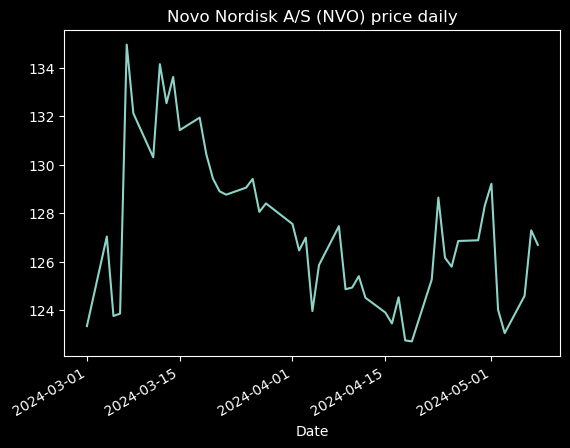

In [45]:
# Chaining: select one column, draw a plot, of a type line
nvo_df_filtered_from_2024['Adj Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')

In [49]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
nvo_df['adj_close_minus_1'] = nvo_df['Adj Close'].shift(-1)
nvo_df['adj_close_plus_1'] = nvo_df['Adj Close'].shift(1)

nvo_df.tail()

,Open,High,Low,Close,Adj Close,Volume,adj_close_minus_1,adj_close_plus_1,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,,,,,,,,
2024-05-02,127.940002,127.940002,123.830002,124.019997,124.019997,8487100,123.050003,129.210007,0.959833,0.958229,0.992179,0
2024-05-03,122.919998,123.769997,121.290001,123.050003,123.050003,5932900,124.589996,124.019997,0.992179,0.954616,1.012515,1
2024-05-06,122.000000,124.639999,121.779999,124.589996,124.589996,3636600,127.290001,123.050003,1.012515,0.967614,1.021671,1
2024-05-07,126.650002,127.800003,126.379997,127.290001,127.290001,4167500,126.690002,124.589996,1.021671,0.986362,0.995286,0
2024-05-08,127.510002,128.429993,126.620003,126.690002,126.690002,4059000,NaN,127.290001,0.995286,0.978982,NaN,0


In [70]:
# historical growth
nvo_df['growth_1d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(1)           # nvo_df['adj_close_plus_1']
nvo_df['growth_30d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(30)

# FUTURE Growth : for regression models
nvo_df['growth_future_1d'] = nvo_df['Adj Close'].shift(-1) / nvo_df['Adj Close']   # nvo_df['adj_close_minus_1']

# FUTURE Growth: for binary models
nvo_df['is_positive_growth_1d_future'] = np.where(nvo_df['growth_future_1d'] > 1, 1, 0)

In [71]:
from datetime import date

end = date.today().replace(day=1, month=5)  # Setting end date to 1st of May
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end}')

Year = 2024; month= 5; day=1
Period for indexes: 1954-05-01 to 2024-05-01


In [72]:
# reuse code for ealier covered indicators
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [73]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Adj Close'] / dax_daily['Adj Close'].shift(i)

In [74]:
dax_daily.head()

,Open,High,Low,Close,Adj Close,Volume,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.951551,NaN,NaN,NaN,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,1.041412,NaN,NaN,NaN,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.009949,1.000816,NaN,NaN,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,1.008409,1.060617,NaN,NaN,NaN,NaN


In [75]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,
2024-05-09,1.002698,1.020527,1.023731,1.015715,1.107252,1.280049


In [76]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

In [77]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [78]:
snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
Date,,,,,,
2024-05-07,1.001343,1.024387,1.017204,0.994157,1.084934,1.313362
2024-05-08,0.999994,1.011678,1.013975,0.996942,1.084526,1.295758


In [79]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [80]:
# generating new fields (using DateTime features):

nvo_df['Ticker'] = 'NVO'
nvo_df['Year']= nvo_df.index.year
nvo_df['Month'] = nvo_df.index.month
nvo_df['Weekday'] = nvo_df.index.weekday
nvo_df['Date'] = nvo_df.index.date # to be used in joins

In [82]:
# Calculate the distribution if future growth
nvo_df.is_positive_growth_1d_future.value_counts() / len(nvo_df)

0    0.512861
1    0.487139
Name: is_positive_growth_1d_future, dtype: float64

In [83]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
Date,,,,,,
2024-05-07,1.000823,1.017229,1.016857,0.989078,1.032604,1.153826
2024-05-08,1.004427,1.009844,1.017462,0.994248,1.035701,1.145412


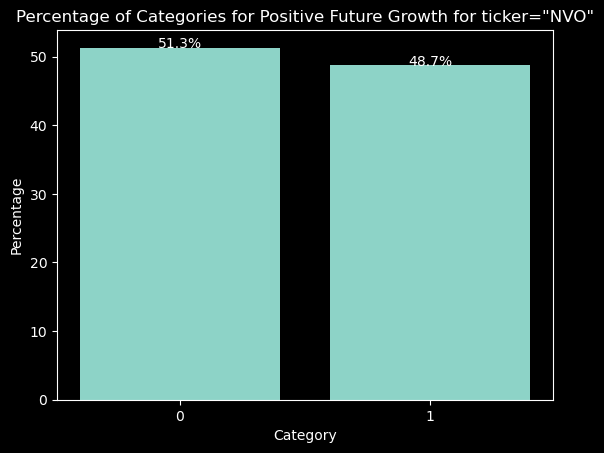

In [84]:
# Calculate value counts
value_counts = nvo_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(nvo_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

In [81]:
##Question 3
### Question 3: Is Growth Concentrated in the Largest Stocks?

In [89]:
import pandas as pd
import yfinance as yf

# Define the stock symbols
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO', 'V', 'JPM']
EU_STOCKS = ['NVO', 'MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE', 'IDEXY', 'CDI.PA']
INDIA_STOCKS = ['RELIANCE.NS', 'TCS.NS', 'HDB', 'BHARTIARTL.NS', 'IBN', 'SBIN.NS', 'LICI.NS', 'INFY', 'ITC.NS', 'HINDUNILVR.NS', 'LT.NS']
LARGEST_STOCKS = US_STOCKS + EU_STOCKS + INDIA_STOCKS

NEW_US = ['TSLA', 'WMT', 'XOM', 'UNH', 'MA', 'PG', 'JNJ', 'MRK', 'HD', 'COST', 'ORCL']
NEW_EU = ['PRX.AS', 'CDI.PA', 'AIR.PA', 'SU.PA', 'ETN', 'SNY', 'BUD', 'DTE.DE', 'ALV.DE', 'MDT', 'AI.PA', 'EL.PA']
NEW_INDIA = ['BAJFINANCE.NS', 'MARUTI.NS', 'HCLTECH.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS', 'ONGC.NS', 'ADANIENT.NS', 'ADANIENT.NS', 'NTPC.NS', 'KOTAKBANK.NS', 'TITAN.NS']
LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA

# Define the time period
start_date = '2013-12-25'
end_date = '2024-01-01'

# Download OHLCV data
data = yf.download(LARGEST_STOCKS, start=start_date, end=end_date)

# Create an empty list to store the category for each stock
ticker_category = []

# Classify each stock into LARGE or LARGEST category
for column in data.columns.get_level_values(1):
    if column in LARGE_STOCKS:
        ticker_category.append('LARGE')
    else:
        ticker_category.append('LARGEST')

# Assign the category list to the DataFrame
data['ticker_category'] = ticker_category

# Create an empty DataFrame to store growth_7d for each stock
growth_7d_data = pd.DataFrame(index=data.index, columns=LARGEST_STOCKS)

# Calculate growth_7d for each stock individually
for stock in LARGEST_STOCKS:
    growth_7d_data[stock] = data['Close'][stock].pct_change(periods=7)

# Calculate average daily growth_7d for each group
group_avg_growth = growth_7d_data.groupby(data['ticker_category'], axis=1).mean()

# Count the number of days where LARGE group outperforms LARGEST group
days_large_outperform = (group_avg_growth['LARGE'] > group_avg_growth['LARGEST']).sum()

# Calculate the percentage of days where LARGE group outperforms LARGEST group
percentage_large_outperform = int((days_large_outperform / len(group_avg_growth)) * 100)

print("Percentage of days when Large Stocks outperform the Largest Stocks:", percentage_large_outperform)


[*********************100%%**********************]  33 of 33 completed


ValueError: Length of values (198) does not match length of index (2599)

In [ ]:
### Question 4: Trying Another Technical Indicators strategy